## Exploratory analysis of the US Airport Dataset

This dataset contains data for 5 years[1995, 2000, 2005, 2010, 2015] of flights between various US airports and the carrier on those routes.

Let's see what can we make out of this!

In [1]:
import networkx as nx
import pandas as pd
air_data = pd.read_csv('dump_output.csv')

We create 5 graphs (one for each year), it may take a couple of minutes to load all the graphs.

In [7]:
air_graph_1995 = air_data[air_data.YEAR == 1995]
G_1995 = nx.DiGraph()
for row in air_graph_1995.iterrows():
    G_1995.add_edge(row[1].ORIGIN, row[1].DEST)

In [8]:
air_graph_2000 = air_data[air_data.YEAR == 2000]
G_2000 = nx.DiGraph()
for row in air_graph_2000.iterrows():
    G_2000.add_edge(row[1].ORIGIN, row[1].DEST)

In [9]:
air_graph_2005 = air_data[air_data.YEAR == 2005]
G_2005 = nx.DiGraph()
for row in air_graph_2005.iterrows():
    G_2005.add_edge(row[1].ORIGIN, row[1].DEST)

In [10]:
air_graph_2010 = air_data[air_data.YEAR == 2010]
G_2010 = nx.DiGraph()
for row in air_graph_2010.iterrows():
    G_2010.add_edge(row[1].ORIGIN, row[1].DEST)

In [11]:
air_graph_2015 = air_data[air_data.YEAR == 2015]
G_2015 = nx.DiGraph()
for row in air_graph_2015.iterrows():
    G_2015.add_edge(row[1].ORIGIN, row[1].DEST)

So let's have a look at the important nodes in this network, i.e. important airports in this network. We'll use pagerank, betweenness centrality and degree centrality.

In [12]:
# Anchorage is somehow high here because it's connected to JFK & LAX only, and those two lift ANC up
sorted(nx.pagerank(G_2015).items(), key=lambda x:x[1], reverse=True)[0:10]

[('ANC', 0.010425531156396328),
 ('HPN', 0.008715287139161585),
 ('FAI', 0.007865131822111036),
 ('DFW', 0.007168038232113768),
 ('DEN', 0.006557279519803016),
 ('ATL', 0.006367579588749718),
 ('ORD', 0.006178836107660133),
 ('YIP', 0.005821525504523931),
 ('ADQ', 0.005482597083474197),
 ('MSP', 0.005481962582230958)]

In [13]:
# ANC is connected to Alaska regional airports, so if we remove ANC, all of Alaska fall off
sorted(nx.betweenness_centrality(G_2015).items(), key=lambda x:x[1], reverse=True)[0:10]

[('ANC', 0.2890745848058655),
 ('FAI', 0.08042857784594376),
 ('SEA', 0.06745549919241688),
 ('HPN', 0.0604681017853471),
 ('ORD', 0.045544143864829294),
 ('ADQ', 0.040170160000905716),
 ('DEN', 0.03854325136424145),
 ('BFI', 0.03811277548952858),
 ('MSP', 0.037748093423406244),
 ('TEB', 0.036229439542316354)]

In [14]:
# The only model to say it as it is, and ANC is not the top for once
sorted(nx.degree_centrality(G_2015).items(), key=lambda x:x[1], reverse=True)[0:10]

[('ATL', 0.3643595863166269),
 ('ORD', 0.354813046937152),
 ('DFW', 0.3420843277645187),
 ('MSP', 0.3261734287987271),
 ('DEN', 0.31821797931583135),
 ('ANC', 0.3046937151949085),
 ('MEM', 0.29196499602227527),
 ('LAX', 0.2840095465393795),
 ('IAH', 0.28082736674622116),
 ('DTW', 0.27446300715990457)]

'ANC' is the airport code of Anchorage airport, a place in Alaska, and according to pagerank and betweenness centrality it is the most important airport in this network Isn't that weird? Thoughts?

related blog post: https://toreopsahl.com/2011/08/12/why-anchorage-is-not-that-important-binary-ties-and-sample-selection/

Let's find the airline which operates the most routes every year? The thing to take into account is routes not flights as this dataset gives us the routes.

In [15]:
airline = [(i, air_data[air_data.YEAR == i].UNIQUE_CARRIER_NAME.value_counts()[0:5].reset_index().rename(columns={0: 'Airline', 'UNIQUE_CARRIER_NAME': 'count'})) for i in [1995, 2000, 2005, 2010, 2015]]

In [16]:
# count of routes of top 5 airlines of each year
airline

[(1995,                         index  count
  0             US Airways Inc.  28606
  1        Delta Air Lines Inc.  21009
  2     Northwest Airlines Inc.  17636
  3       United Air Lines Inc.  17224
  4  Continental Air Lines Inc.  13847),
 (2000,                      index  count
  0          US Airways Inc.  23343
  1    United Air Lines Inc.  21345
  2     Delta Air Lines Inc.  20675
  3  Northwest Airlines Inc.  19715
  4   Southwest Airlines Co.  16603),
 (2005,                          index  count
  0       Southwest Airlines Co.  20869
  1  Federal Express Corporation  19425
  2      Northwest Airlines Inc.  17300
  3        United Air Lines Inc.  15056
  4         Delta Air Lines Inc.  14875),
 (2010,                          index  count
  0       Southwest Airlines Co.  26916
  1         Delta Air Lines Inc.  26914
  2  Federal Express Corporation  17071
  3    Hageland Aviation Service  16127
  4        SkyWest Airlines Inc.  13185),
 (2015,                       index  c

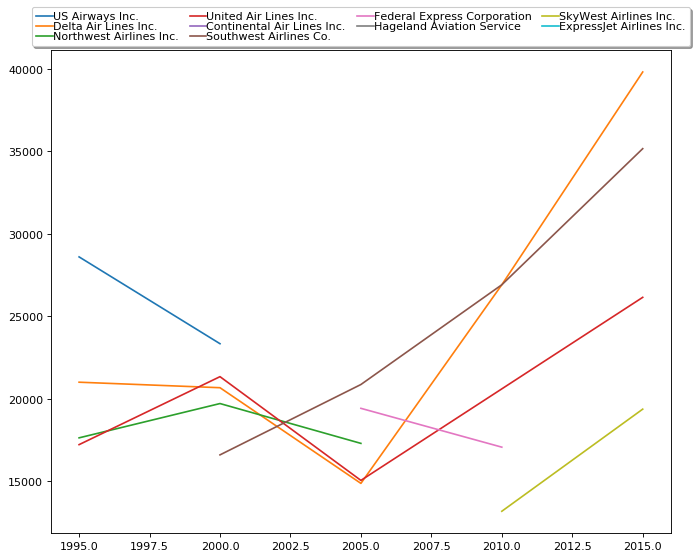

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# dictionary to store data to plot
d = {}
for i, year in airline:
    for row in year.iterrows():
        if row[1][0] in d:
            d[row[1][0]].append((i, row[1][1]))
        else:
            d[row[1][0]] = [(i, row[1][1])]
            
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
labels = []
for i, j in d.items():
    year = [k for k, l in j]
    per = [l for k,l in j]
    plt.plot(year, per)
    labels.append(i)
plt.legend(labels, ncol=4, loc='upper center', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)

In [20]:
# There's something wrong here, it's implying there are places in America which cannot connect to with each other
nx.average_shortest_path_length(G_2015)

NetworkXError: Graph is not weakly connected.

In [21]:
# In reality, there are three airports which are formatted weird
# and another two that share the same code
list(nx.connected_components(G_2015.to_undirected()))  # Scroll all the way down to see the bug
G_2015.remove_nodes_from(['AIK', 'SPB', 'SSB'])

3.028101946281858

(array([ 978.,  118.,   55.,   22.,   33.,   19.,   12.,   11.,    4.,    3.]),
 array([ 0.00079745,  0.03724083,  0.07368421,  0.11012759,  0.14657097,
         0.18301435,  0.21945774,  0.25590112,  0.2923445 ,  0.32878788,
         0.36523126]),
 <a list of 10 Patch objects>)

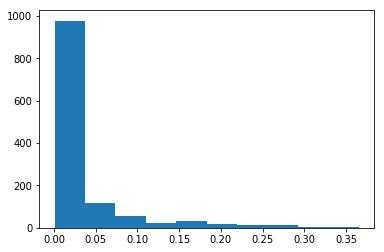

In [22]:
# Let's do this again. It looks like it's connected now!
nx.is_weakly_connected(G_2015)

# This means you can reach any airport from another in about 3 steps
nx.average_shortest_path_length(G_2015)

plt.hist(list(nx.degree_centrality(G_2015).values()))

#### Exercise! (Actually this is a game :D)

How can we decrease the avg shortest path length of this network?

Think of an effective way to add new edges to decrease the avg shortest path length.
Let's see if we can come up with a nice way to do this, and the one who gets the highest decrease wins!!!

The rules are simple:
- You can't add more than 2% of the current edges( ~500 edges)

In [26]:
sort_degree = sorted(nx.degree_centrality(G_2015).items(), key=lambda x:x[1], reverse=True)

In [31]:
top_count = 0
for n, v in sort_degree:
    count = 0
    for node, val in sort_degree:
        if node != n:
            if node not in G_2015.adj[n]:
                G_2015.add_edge(n, node)
                count += 1
                if count == 25:
                    break
    top_count += 1
    if top_count == 20:
        break

In [32]:
G_2015.number_of_edges()

25877

In [33]:
nx.average_shortest_path_length(G_2015) 

2.9429713363452095

In [30]:
0.021171454532745937/3.028101946281858 *100

0.6991658440939188

In [23]:
G_2015.describe()

AttributeError: 'DiGraph' object has no attribute 'describe'